['sets.csv', 'inventory_parts.csv', 'themes.csv', 'inventories.csv', 'part_categories.csv', 'parts.csv', 'inventory_sets.csv', 'downloads_schema.png', 'colors.csv']


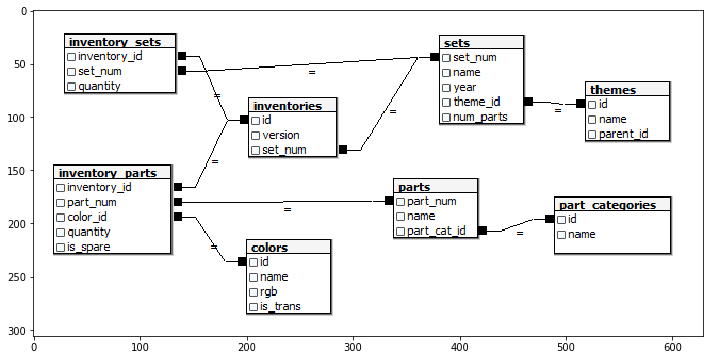

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir('../input/lego-database'))

import matplotlib.image as mpimg
img=mpimg.imread('../input/lego-database/downloads_schema.png')
plt.figure(figsize= (12,12))
imgplot = plt.imshow(img)
plt.show()

The dataset is quite annoying than I thought.
It's a graph that reminds me of my previous DB class.

In [2]:
# Read All dataset first
colors = pd.read_csv('../input/lego-database/colors.csv')
sets = pd.read_csv('../input/lego-database/sets.csv')
themes = pd.read_csv('../input/lego-database/themes.csv')
parts =pd.read_csv('../input/lego-database/parts.csv')
inventories = pd.read_csv('../input/lego-database/inventories.csv')
inventory_sets = pd.read_csv('../input/lego-database/inventory_sets.csv')
part_categories =  pd.read_csv('../input/lego-database/part_categories.csv')
inventory_parts = pd.read_csv('../input/lego-database/inventory_parts.csv')

colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 1. Color set : Colors.csv

In [3]:
#colors = colors.drop(['id', 'is_trans'], axis=1)
colors['rgb'] = colors['rgb'].apply(lambda x : '#'+x)
colors_set = dict(zip(colors.name, colors.rgb))
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,#0033B2,f
1,0,Black,#05131D,f
2,1,Blue,#0055BF,f
3,2,Green,#237841,f
4,3,Dark Turquoise,#008F9B,f


In [4]:
colors.describe(include='all')


,id,name,rgb,is_trans
count,135.000000,135,135,135
unique,NaN,135,124,2
top,NaN,Magenta,#000000,f
freq,NaN,1,3,107
mean,253.037037,NaN,NaN,NaN
std,878.441466,NaN,NaN,NaN
min,-1.000000,NaN,NaN,NaN
25%,34.500000,NaN,NaN,NaN
50%,85.000000,NaN,NaN,NaN
75%,231.000000,NaN,NaN,NaN


Let's see what color is in Lego

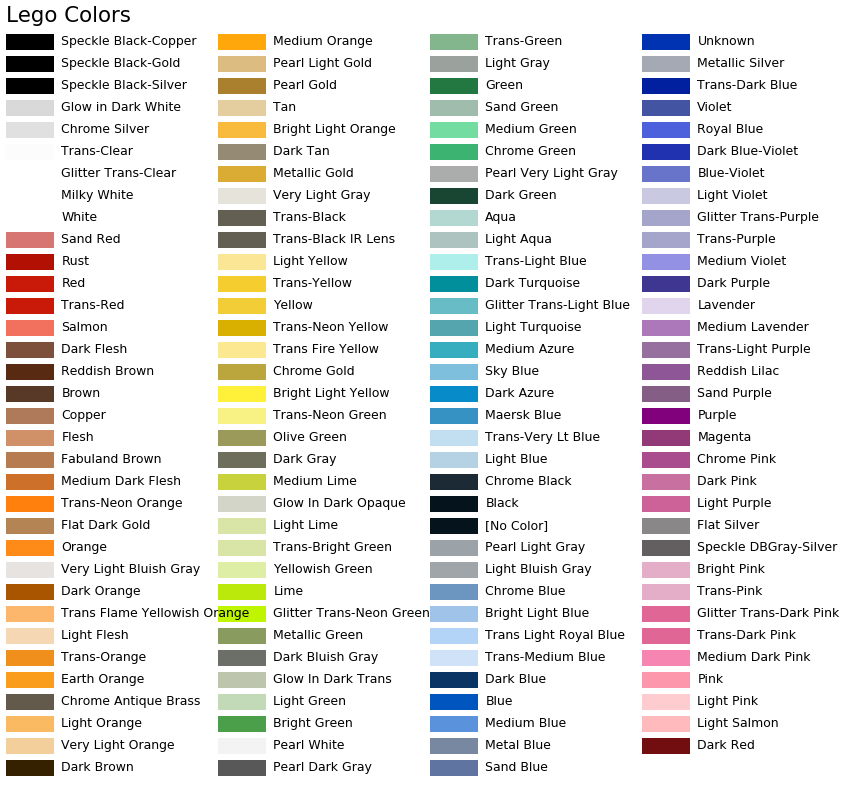

In [5]:
# source code from https://matplotlib.org/3.1.1/gallery/color/named_colors.html
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 64

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(colors_set, "Lego Colors")
plt.show()

## 2. themes

What is themes?

In [6]:
themes.head(5)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [7]:
themes['name'].value_counts()

Supplemental                    18
Fire                            12
Airport                         11
Traffic                          9
Harbor                           9
                                ..
Series 2 Minifigures             1
Star Wars Rogue One              1
Blacktron I                      1
Kingdom of the Crystal Skull     1
Series 3                         1
Name: name, Length: 402, dtype: int64

## 3. Sets

In [8]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets['name'].value_counts()

Basic Building Set                  55
Universal Building Set              32
Basic Set                           23
Helicopter                          23
Tow Truck                           14
                                    ..
Ultra-Light                          1
Little Plane                         1
TIE Interceptor - Mini (Polybag)     1
Whirlwind Rescue                     1
Abraham Lincoln                      1
Name: name, Length: 10370, dtype: int64

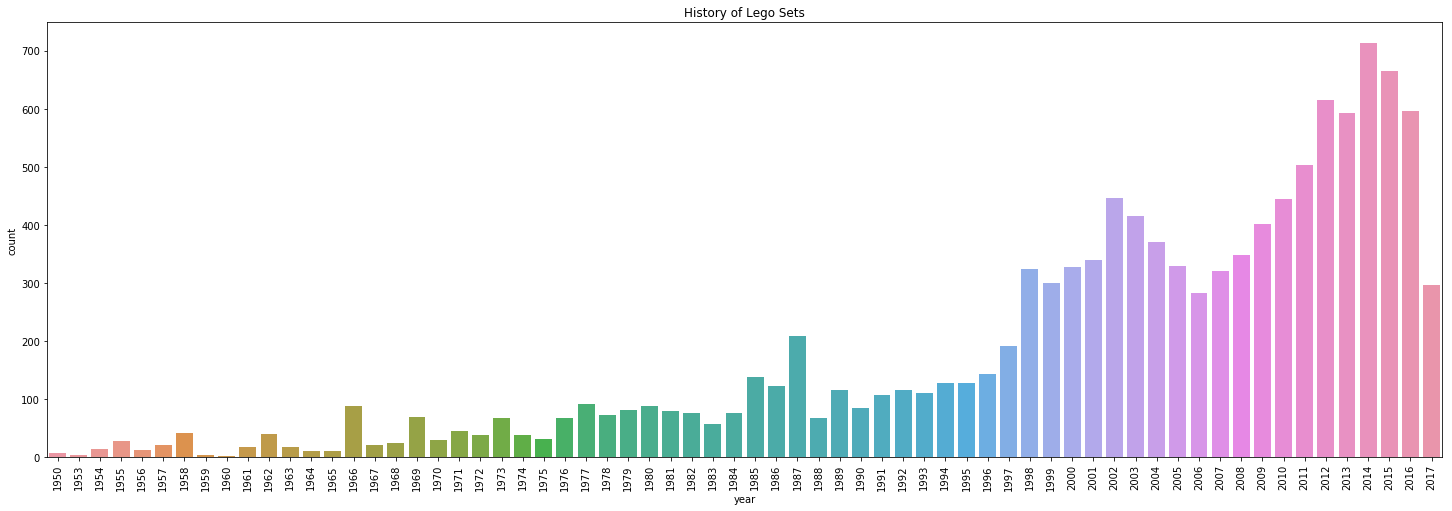

In [10]:
fig, ax = plt.subplots(1,1,figsize=(25, 8))
sns.countplot(sets['year'],)
plt.xticks(rotation=90)
plt.title('History of Lego Sets')
plt.show()

## 4. Inventories & Inventory Sets

In [11]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [12]:
inventories.describe()

,id,version
count,11681.000000,11681.000000
mean,8412.481551,1.001541
std,4880.737513,0.057018
min,1.000000,1.000000
25%,4156.000000,1.000000
50%,8404.000000,1.000000
75%,12585.000000,1.000000
max,18708.000000,5.000000


In [13]:
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


## 5. Parts & Part_categories

In [14]:
parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [15]:
parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993 entries, 0 to 25992
Data columns (total 3 columns):
part_num       25993 non-null object
name           25993 non-null object
part_cat_id    25993 non-null int64
dtypes: int64(1), object(2)
memory usage: 609.3+ KB


In [16]:
part_categories.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [17]:
part_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
id      57 non-null int64
name    57 non-null object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


# 6. Inventory Parts

In [18]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [19]:
inventory_parts['color_id'].value_counts()

0       115176
15       66549
71       55317
4        50217
72       43913
         ...  
503          2
1001         2
68           2
62           2
1006         1
Name: color_id, Length: 131, dtype: int64

In [20]:
color_count = inventory_parts['color_id'].value_counts()


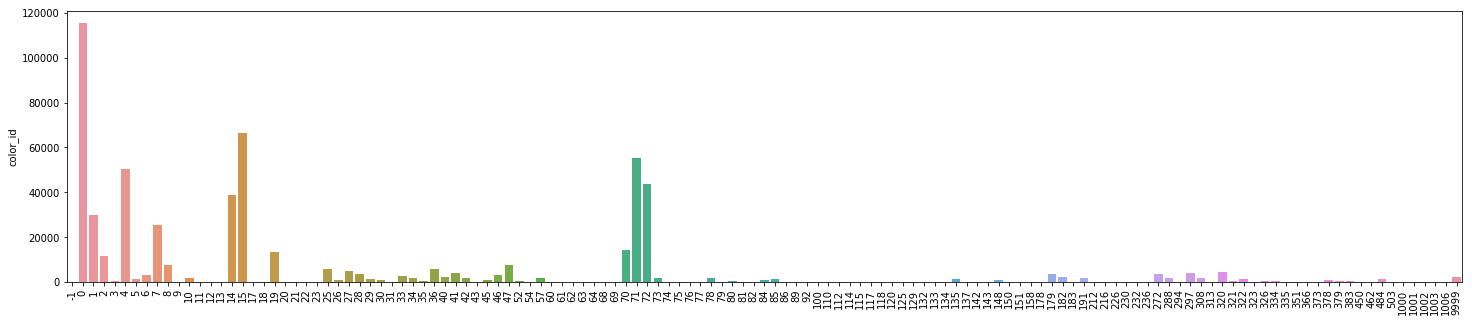

In [21]:
fig, ax = plt.subplots(1,1,figsize=(25, 5))
sns.barplot(color_count.index, color_count, ax=ax)
ax.set_xticklabels(sorted(color_count.index), rotation=90)
plt.show()

Now let's color the graph (origin color)

In [22]:
colors_id = dict(zip(colors.id, colors.rgb))
#print(colors_id)
inventory_parts['color'] = inventory_parts['color_id'].apply(lambda id : colors_id[id])

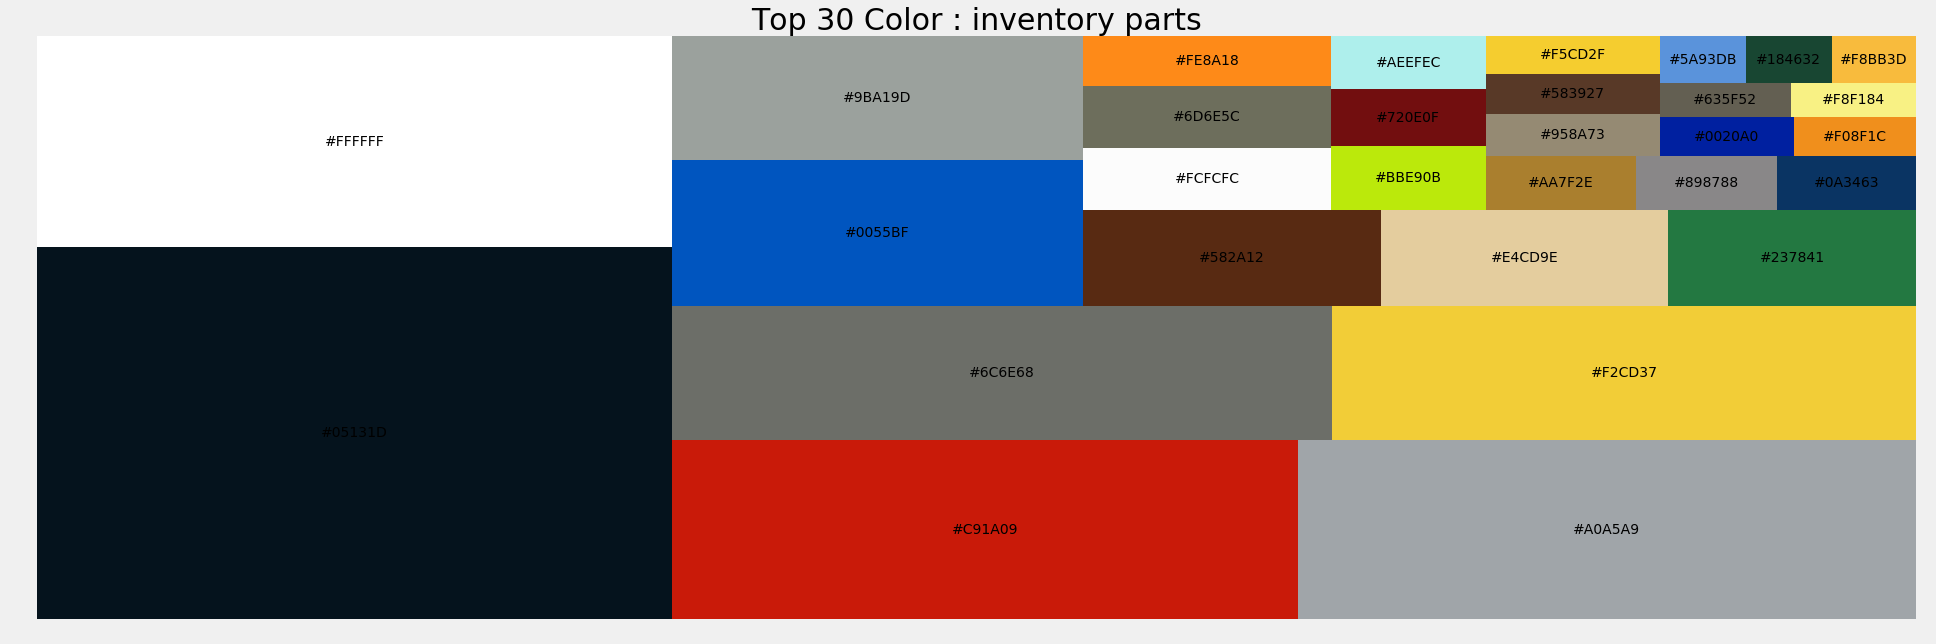

In [23]:
import squarify
y = inventory_parts['color'].value_counts()[:30]
    
plt.rcParams['figure.figsize'] = (30, 10)
plt.style.use('fivethirtyeight')

color_this_graph = y.index
squarify.plot(sizes = y.values, label = y.index, color = color_this_graph)
plt.title('Top 30 Color : inventory parts', fontsize = 30)
plt.axis('off')
plt.show()